# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Città disposte su una circonferenza

Per offrire un confronto migliore, il problema è stato risolto facendo lavorare il programma due volte con le stesse condizioni iniziali (numero di core e prime del generatore di numeri casuali), ma togliendo la possibilità di migrare nel caso non parallelo.

Il confronto mostra che il calcolo parallelo porta ad una soluzione più veloce rispetto al caso non parallelo.

Sono stati utilizzati solamente 4 core per il calcolo parallelo, avendo a disposizionne più core il risultato sarebbe stato di certo più evidente.

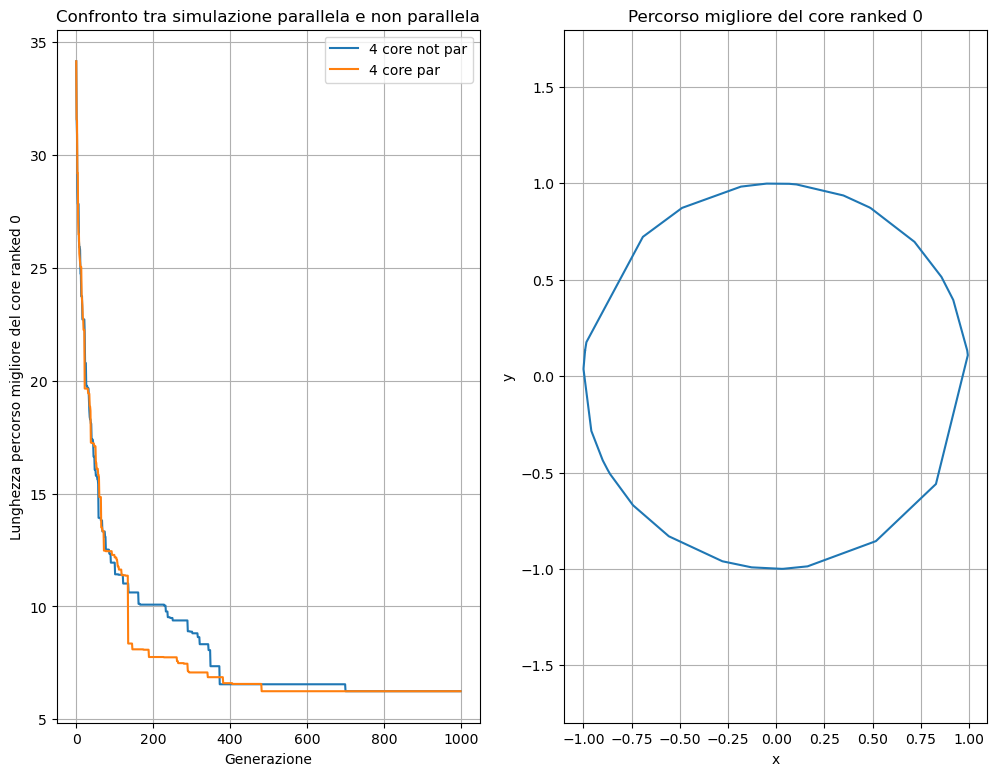

In [54]:
N = 34 #Cities
x = np.arange(0,1000)

LenghtNPC, AverageNPC = np.loadtxt("Circ/not_par/circ-Lbest.dat", unpack=True)
LenghtPC, AveragePC = np.loadtxt("Circ/par/circ-Lbest.dat", unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 9))

axs[0].plot(x, LenghtNPC, label = '4 core not par')
axs[0].plot(x, LenghtPC, label = '4 core par' )
axs[0].set_xlabel('Generazione')
axs[0].set_ylabel('Lunghezza percorso migliore del core ranked 0')
axs[0].set_title('Confronto tra simulazione parallela e non parallela')
axs[0].legend()
axs[0].grid(True)

name, x, y = np.loadtxt("Circ/par/circ-city.dat", unpack=True) # carico dati da file

axs[1].plot(x,y)
axs[1].axis('equal')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Percorso migliore del core ranked 0')
axs[1].grid(True)


## Capitali degli stati americani

Lo stesso procedimento è stato ripetuto con le capitali americane. È evidente che l'uso del calcolo parallelo abbia velocizzato l'algoritmo genetico.

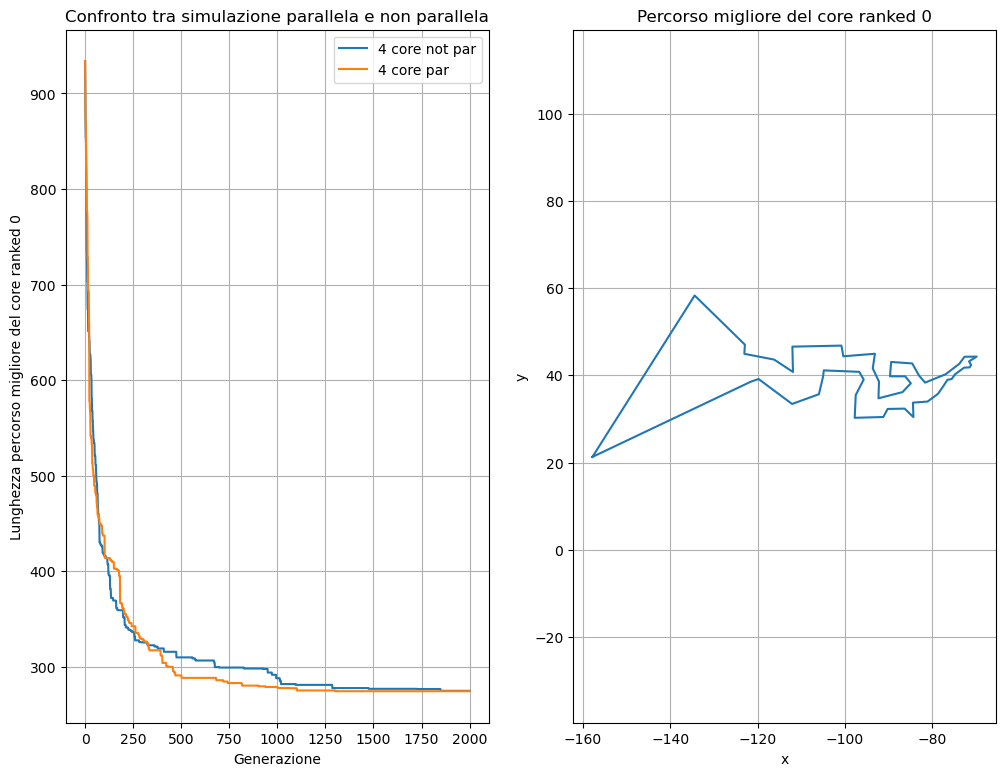

In [53]:
N = 50
x = np.arange(0,2000)

LenghtNPC, AverageNPC = np.loadtxt("America/not_par/America-Lbest.dat", unpack=True)
LenghtPC, AveragePC = np.loadtxt("America/par/America-Lbest.dat", unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 9))

axs[0].plot(x, LenghtNPC, label = '4 core not par')
axs[0].plot(x, LenghtPC, label = '4 core par' )
axs[0].set_xlabel('Generazione')
axs[0].set_ylabel('Lunghezza percorso migliore del core ranked 0')
axs[0].set_title('Confronto tra simulazione parallela e non parallela')
axs[0].legend()
axs[0].grid(True)

name, x, y = np.loadtxt("America/par/America-city.dat", unpack=True) # carico dati da file

axs[1].plot(x,y)
axs[1].axis('equal')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Percorso migliore del core ranked 0')
axs[1].grid(True)